In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load lemmatized data

In [78]:
data = pd.read_csv('./data/lemmatized_posts.csv')

In [79]:
data.head(3)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
0,middle aged guys don't buy sports cars because...,1,middle aged guys don't buy sports cars because...,"['middle', 'aged', 'guys', 'buy', 'sports', 'c...","['middle', 'age', 'guy', 'buy', 'sport', 'car'...",middle age guy buy sport car mid life crisis f...
1,"""y'all"" is a brilliant use of the english lang...",1,"""y'all"" is a brilliant use of the english lang...","['brilliant', 'use', 'english', 'language', 'r...","['brilliant', 'use', 'english', 'language', 'r...",brilliant use english language refuse tell oth...
2,i always eat dessert before dinner at a restau...,1,i always eat dessert before dinner at a restau...,"['always', 'eat', 'dessert', 'dinner', 'restau...","['always', 'eat', 'dessert', 'dinner', 'restau...",always eat dessert dinner restaurantwhen resta...


In [80]:
data.shape

(3584, 6)

### Train Multinomial Naive Bayes ML using lammatized data

In [81]:
X = data['joined_words']
y = data['sent_score']

In [82]:
y.value_counts(normalize = True)

sent_score
1    0.53404
0    0.46596
Name: proportion, dtype: float64

In [83]:
1-y.mean()

0.4659598214285714

In [84]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=2024)

In [85]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [86]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [87]:
X_train_cv.shape, X_test_cv.shape

((2150, 13220), (1434, 13220))

In [88]:
# Bernoulli Naive Bayes
nb = MultinomialNB()

In [89]:
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [90]:
nb.score(X_train_cv, y_train)

0.9767441860465116

In [91]:
nb.score(X_test_cv, y_test)

0.9504881450488145

In [92]:
nb.predict(X_test_cv)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

#### KFold cross-validation

In [112]:
cross_val_score(nb, X_train_cv, y_train, cv=5)

array([0.95813953, 0.94186047, 0.94418605, 0.94418605, 0.95581395])

In [111]:
np.mean(cross_val_score(nb, X_train_cv, y_train, cv=5))

0.9488372093023255

In [113]:
cross_val_score(nb, X_test_cv, y_test, cv=5)

array([0.94773519, 0.93031359, 0.96167247, 0.96515679, 0.94405594])

In [95]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True, random_state=2024)
np.mean(cross_val_score(nb, X_train_cv, y_train, cv = kf))

0.947906976744186

#### Apply trained random forest  ML for Sentiment prediction of  college posts.

In [96]:
college = pd.read_csv('./data/coll_lemmatized_posts.csv')

In [97]:
data.sample(3)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
1159,most people are actually very happy don't get ...,1,most people are actually very happy don't get ...,"['people', 'actually', 'happy', 'get', 'wrong'...","['people', 'actually', 'happy', 'get', 'wrong'...",people actually happy get wrong say everyone h...
710,being downvoted on reddit is a painful feeling...,1,being downvoted on reddit is a painful feeling...,"['downvoted', 'reddit', 'painful', 'feeling', ...","['downvoted', 'reddit', 'painful', 'feeling', ...",downvoted reddit painful feeling know suppose ...
726,i'm not responsible for what your children hea...,1,i'm not responsible for what your children hea...,"['responsible', 'children', 'hear', 'online', ...","['responsible', 'child', 'hear', 'online', 'ev...",responsible child hear online even one say par...


In [98]:
X_coll = college['joined_words']
y_coll = college['sent_score']

In [99]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [100]:
X_coll_cv = cvec.transform(X_coll)

In [101]:
X_train_cv.shape, X_coll_cv.shape

((2150, 13220), (1670, 13220))

In [102]:
coll_predictions =nb.predict(X_coll_cv)

In [103]:
print(classification_report(coll_predictions, y_coll, digits = 3))

              precision    recall  f1-score   support

           0      0.986     1.000     0.993      1647
           1      0.000     0.000     0.000        23

    accuracy                          0.986      1670
   macro avg      0.493     0.500     0.497      1670
weighted avg      0.973     0.986     0.979      1670



C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


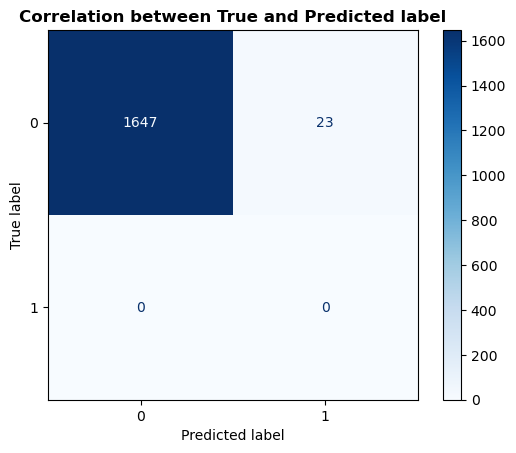

In [104]:
ConfusionMatrixDisplay.from_predictions(y_coll, coll_predictions, cmap = 'Blues')
plt.title('Correlation between True and Predicted label', weight = 'bold');

## *Vulgar language warning!!!!*

#### List of all false predicetd posts 

In [105]:
pred_colls = pd.DataFrame(coll_predictions, columns=['predictions'])

In [106]:

false_pred = college.iloc[pred_colls[pred_colls['predictions'] == 1].index]
false_pred

,post,sent_score,post_tokenized,post_lemmatized,joined_words
45,it’s honestly disgusting what happened to easy...,0,"['honestly', 'disgusting', 'happened', 'easybi...","['honestly', 'disgust', 'happen', 'easybibyoun...",honestly disgust happen easybibyounger zoomers...
47,writing prof here: how to add to essay length ...,0,"['writing', 'prof', 'add', 'essay', 'length', ...","['write', 'prof', 'add', 'essay', 'length', 'w...",write prof add essay length without fluff form...
51,roomate goes to bed so early and gets annoyed ...,0,"['roomate', 'goes', 'bed', 'early', 'gets', 'a...","['roomate', 'go', 'bed', 'early', 'get', 'anno...",roomate go bed early get annoy tok move dorm f...
64,i just flashed in front of peoplei was on a ...,0,"['flashed', 'front', 'peoplei', 'zoom', 'call'...","['flash', 'front', 'peoplei', 'zoom', 'call', ...",flash front peoplei zoom call know camera chan...
100,"i don't know who needs to hear this, but... . ...",0,"['know', 'needs', 'hear', 'go', 'drink', 'glas...","['know', 'need', 'hear', 'go', 'drink', 'glass...",know need hear go drink glass water eat health...
135,just a reminder for incoming freshman to make ...,0,"['reminder', 'incoming', 'freshman', 'make', '...","['reminder', 'incoming', 'freshman', 'make', '...",reminder incoming freshman make smart decision...
143,safety tips for college womeni am reposting fr...,0,"['safety', 'tips', 'college', 'womeni', 'repos...","['safety', 'tip', 'college', 'womeni', 'repost...",safety tip college womeni reposting list make ...
207,"yo peeps, weekends are supposed to be for rela...",0,"['yo', 'peeps', 'weekends', 'supposed', 'relax...","['yo', 'peep', 'weekend', 'suppose', 'relaxati...",yo peep weekend suppose relaxation fuck much shit
278,"do not, under any circumstances, attempt to ma...",0,"['circumstances', 'attempt', 'make', 'macaroni...","['circumstance', 'attempt', 'make', 'macaroni'...",circumstance attempt make macaroni cheese elec...
349,what are some college culture moments or unspo...,0,"['college', 'culture', 'moments', 'unspoken', ...","['college', 'culture', 'moment', 'unspoken', '...",college culture moment unspoken rulesi go firs...


In [107]:
false_pred['post'][45]

'it’s honestly disgusting what happened to easybibyounger zoomers might not catch my drift here but damn i remember when easybib was a accessible website with literally two buttons “cite” and “search” now it’s the digital equivalent of a magazine tabloid. there’s a ton of ads everywhere, a bunch of annoying pop ups, a lot of text all around the site that blocks and obstructs everything. i also now have to watch a   second ad just to cite a source. i’m just saddened to see what was a simple and helpful service now become a monstrosity of web design.'

In [108]:
false_pred['post'][1161]

'neighbors blasting bass boosted musici live in a dorm and my neighbors just blast heavy bass music for hours on end. i’ve told them to turn it down multiple times and whenever they answer the door they always say ‘is it the music?’ so they know it’s a problem but they just don’t care. they know that i can hear it and that’s it’s loud. i just cannot fathom how people can just blast music without a care in the world for other people. there’s no point in me going to the ra because he’s so passive he won’t do anything. it’s genuinely so frustrating because i can’t even hear music, it’s just straight bass and vibrations and it feels like the same   fucking beats over and over again. it’s a little pill shaped speaker but the base is so ridiculously loud. i just have no idea what i should do.'

In [109]:
false_pred['post'][828]

'why do only so little colleges offer men’s volleyball or lacrosse?the only two good sports i’m good at, and my state (nj) barely has any colleges that do have the sport, even nationally the sports aren’t very available. it’s already annoying that i had to join a men’s club since no highschool offers it but almost everywhere there is an equivalent for women’s lacrosse and volleyball. i understand that there are/were a lot of sports that women didn’t have that men did, but nowadays it’s mostly equal '

In [110]:
false_pred['post'][1453]

'feeling out of placei don’t think i belong here, everyone here is so much better than me, at academics, at extracurriculars, at everything single damn thing! all i do is wallow in my own self-pity!\ni can’t do anything right for the life of me!\ni think i am literally the most boring person in class. and all i can do is wallow in my own self-pity. \nplease help a stranger find their identity or peace in their uselessness🙏'